In [ ]:
#utilities
import re
import numpy as np
import pandas as pd
#plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/ML Project"

/content/drive/MyDrive/ML Project


Selecting random 10000 tweets from dataset

In [ ]:
import pandas
import random

filename = "training.csv"
n = sum(1 for line in open(filename, encoding = 'Latin-1')) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pandas.read_csv(filename, skiprows=skip,encoding = 'Latin-1',names=('target','id','date','flag','username','tweet'))

In [ ]:
df

,target,id,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467843215,Mon Apr 06 22:28:18 PDT 2009,NO_QUERY,mikecogh,@ozesteph1992 Shame to hear this Stephan
2,0,1467874479,Mon Apr 06 22:36:26 PDT 2009,NO_QUERY,princessseli,Missing My BFF watching home and away it remi...
3,0,1467891880,Mon Apr 06 22:41:06 PDT 2009,NO_QUERY,Ps8612,"Argh! I was suuuper sleepy an hour ago, now I'..."
4,0,1467905378,Mon Apr 06 22:44:52 PDT 2009,NO_QUERY,raymondroman,Wow. The most depressing thing in the world is...
...,...,...,...,...,...,...
9996,4,2193321678,Tue Jun 16 08:17:56 PDT 2009,NO_QUERY,StevenL57,"@BostonTweet Had a great time at Boloco, sorry..."
9997,4,2193345939,Tue Jun 16 08:19:58 PDT 2009,NO_QUERY,citizenziggy,@dundas square. TO thanks @wirelesstoronto btw...
9998,4,2193371737,Tue Jun 16 08:22:03 PDT 2009,NO_QUERY,kinan1,@alshebli Enjoy it! w Allah yet2abbal when u c...
9999,4,2193553224,Tue Jun 16 08:36:50 PDT 2009,NO_QUERY,juiceboxkiller,Going to tampa saturday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    10001 non-null  int64 
 1   id        10001 non-null  int64 
 2   date      10001 non-null  object
 3   flag      10001 non-null  object
 4   username  10001 non-null  object
 5   tweet     10001 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10001, 6)

In [ ]:
df.tweet

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                @ozesteph1992 Shame to hear this Stephan 
2        Missing My BFF  watching home and away it remi...
3        Argh! I was suuuper sleepy an hour ago, now I'...
4        Wow. The most depressing thing in the world is...
                               ...                        
9996     @BostonTweet Had a great time at Boloco, sorry...
9997     @dundas square. TO thanks @wirelesstoronto btw...
9998     @alshebli Enjoy it! w Allah yet2abbal when u c...
9999                              Going to tampa saturday 
10000        Then  we head out again Denmark here we come 
Name: tweet, Length: 10001, dtype: object

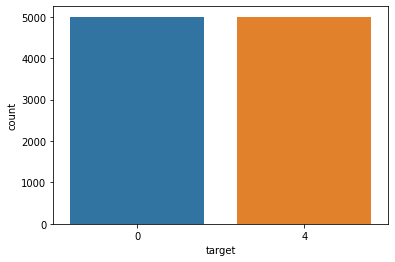

In [ ]:
sns.countplot(x = 'target',data = df) #The dataset is balanced since there are 5000 positive tweets and 5000 negative tweets.

In [ ]:
# dropped columns
df.drop(['id','date','flag','username'], axis=1, inplace=True)

In [ ]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,@ozesteph1992 Shame to hear this Stephan
2,0,Missing My BFF watching home and away it remi...
3,0,"Argh! I was suuuper sleepy an hour ago, now I'..."
4,0,Wow. The most depressing thing in the world is...


Data Preprocessing 

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'] 

def preprocess(textdata , wordLemm):
    processedText = []
  
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern,' URL',tweet)
        for emoji in emojis.keys():
           tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        #STOPWORDS = set(stopwordlist)
        #tweet = " " .join([word for word in str(tweet).split() if word not in STOPWORDS])
        
        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
df.tweet  = preprocess(df.tweet , wordLemm)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df.tweet 

0        USER URL aww that bummer you shoulda got david...
1                         USER shame to hear this stephan 
2        missing my bff watching home and away it remin...
3        argh wa suuper sleepy an hour ago now wide awa...
4        wow the most depressing thing in the world is ...
                               ...                        
9996     USER had great time at boloco sorry didn get c...
9997     USER square to thanks USER btw should put wite...
9998         USER enjoy it allah yet2abbal when come back 
9999                              going to tampa saturday 
10000         then we head out again denmark here we come 
Name: tweet, Length: 10001, dtype: object

In [ ]:

# sklearn
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# converting the 4 in target column to 1 to denote the value 'positive'
df.target = df.target.apply(lambda x: 1 if x==4 else x)

In [ ]:
X = df.tweet
y = df.target

In [ ]:
X

0        USER URL aww that bummer you shoulda got david...
1                         USER shame to hear this stephan 
2        missing my bff watching home and away it remin...
3        argh wa suuper sleepy an hour ago now wide awa...
4        wow the most depressing thing in the world is ...
                               ...                        
9996     USER had great time at boloco sorry didn get c...
9997     USER square to thanks USER btw should put wite...
9998         USER enjoy it allah yet2abbal when come back 
9999                              going to tampa saturday 
10000         then we head out again denmark here we come 
Name: tweet, Length: 10001, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size = 0.8 , test_size = 0.2 ,random_state=0)
# Used 80% data for training and 20% data for testing

In [ ]:
X_train

4757                                     too much coffee 
7302    going to work anxious be home around but group...
9010                       chillin outside wit everybody 
356                                 out to work ick rain 
49      wish hattiesburg wa cool enough for eddie izza...
                              ...                        
9225    check my blog there some photostuff on there U...
4859    how long ago wa it that announced 300 day of h...
3264    so my pic of me amp joe didn work out but hann...
9845    buzzvn ng gi v xe ng gi v xe photo nhi nh gia ...
2732        used to play water polo but my horse drowned 
Name: tweet, Length: 8000, dtype: object

In [ ]:
pd.DataFrame(X_train ,y_train).info

<bound method DataFrame.info of                                                     tweet
target                                                   
0       USER URL aww that bummer you shoulda got david...
1                        USER shame to hear this stephan 
1                        USER shame to hear this stephan 
0       USER URL aww that bummer you shoulda got david...
0       USER URL aww that bummer you shoulda got david...
...                                                   ...
1                        USER shame to hear this stephan 
0       USER URL aww that bummer you shoulda got david...
0       USER URL aww that bummer you shoulda got david...
1                        USER shame to hear this stephan 
0       USER URL aww that bummer you shoulda got david...

[8000 rows x 1 columns]>

In [ ]:
#Hyper parameter tunning for CountVectorizer and SGDClassifier
pipeline = Pipeline([
           ('vect', CountVectorizer()),
           ('clf', SGDClassifier()),
])
parameters = [{
  
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2), (1,3),(2,2))  ,
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (10, 50, 80)
}]


grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=5)


In [ ]:
best_clfvector = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
best_clfvector.best_estimator_

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 3))),
                ('clf', SGDClassifier(alpha=1e-06, max_iter=80))])

In [ ]:
#CountVectorizer convert a collection of text documents to a vector of term/token counts
vectoriser = CountVectorizer( ngram_range=(1,3),max_features=500000)
vectoriser.fit_transform(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  140421


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train

4757                                     too much coffee 
7302    going to work anxious be home around but group...
9010                       chillin outside wit everybody 
356                                 out to work ick rain 
49      wish hattiesburg wa cool enough for eddie izza...
                              ...                        
9225    check my blog there some photostuff on there U...
4859    how long ago wa it that announced 300 day of h...
3264    so my pic of me amp joe didn work out but hann...
9845    buzzvn ng gi v xe ng gi v xe photo nhi nh gia ...
2732        used to play water polo but my horse drowned 
Name: tweet, Length: 8000, dtype: object

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


In [ ]:
print(X_train[0], '\n', X_train[0]) #Bag-of-words 

  (0, 22514)	1
  (0, 72457)	1
  (0, 72497)	1
  (0, 118965)	1
  (0, 119170)	1
  (0, 119174)	1 
   (0, 22514)	1
  (0, 72457)	1
  (0, 72497)	1
  (0, 118965)	1
  (0, 119170)	1
  (0, 119174)	1


LOGISTIC REGRESSION

In [ ]:
# Hyper parameter tuning for logistic regression 

In [ ]:
logModel = LogisticRegression()
param_grid = [    
    {
        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
        'max_iter' : [100, 1000,2500, 5000],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     
    }
]

        

In [ ]:
#LogisticRegression(C=0.615848211066026)
#LogisticRegression(solver='saga')

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1438.44988828766, solver='saga')

In [ ]:
logistic = LogisticRegression(C =2, max_iter = 100, solver= 'saga').fit(X_train,y_train)
#testing
y_pred2= logistic.predict(X_test)
print(confusion_matrix(y_pred2,y_test))

[[735 251]
 [246 769]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print(classification_report(y_pred2,y_test))
#Got 0.75 accuracy in logistic regression

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       986
           1       0.75      0.76      0.76      1015

    accuracy                           0.75      2001
   macro avg       0.75      0.75      0.75      2001
weighted avg       0.75      0.75      0.75      2001



In [ ]:
#Logistic Regression with SGD training
paramsSGD = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
gridSGD = GridSearchCV(clf, param_grid=paramsSGD, cv=5)


gridSGD.fit(X_train,y_train)

print(gridSGD.best_params_) 
grid_predictionsSGD = gridSGD.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictionsSGD)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

{'alpha': 0.0001, 'loss': 'log', 'penalty': 'elasticnet'}
Accuracy: 0.75


In [ ]:
# dataframe for test and predicted sentiments (from logistic regression model)
LRtest = pd.DataFrame(list(zip((vectoriser.inverse_transform(X_test)) ,y_pred2, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
LRtest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,"[and, and love, can, can fix, fix, it, love, l...",1,1
1,"[bad, homework, so, so bad, sux]",0,0
2,"[crap, is, weather, weather is]",0,0
3,"[cry, depressed, feel, go, little, miss, natha...",0,0
4,"[better, body, enough, exactly, exactly what, ...",0,0
...,...,...,...
1996,"[an, code, don, don mind, if, if you, if you d...",1,1
1997,"[get, get ready, go, go get, gotta, gotta go, ...",1,1
1998,"[another, another one, aww, aww sorry, hope, o...",0,0
1999,"[not, number, presentation, slide, user, user ...",0,1


In [ ]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos','False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       981
           1       0.76      0.75      0.76      1020

    accuracy                           0.75      2001
   macro avg       0.75      0.75      0.75      2001
weighted avg       0.75      0.75      0.75      2001



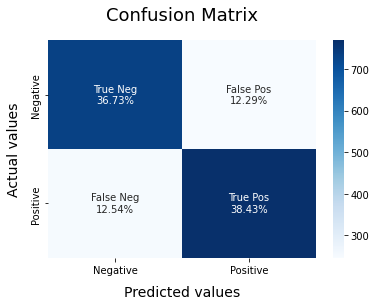

In [ ]:
model_evaluate(logistic)

NAIVE BAYES MODEL

In [ ]:
nb_classifier = BernoulliNB()
#Hyper parameter tuning for bernouli naive bayes
params_NB = { 'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   #number of cross-validation 
                 verbose=5, 
                 n_jobs=-1)
gs_NB.fit(X_train, y_train)
print('Train Accuracy : %.3f'%gs_NB.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%gs_NB.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gs_NB.best_score_)
print('Best Parameters : ',gs_NB.best_params_)
gs_NB.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.982
Test Accuracy : 0.717
Best Accuracy Through Grid Search : 0.718
Best Parameters :  {'alpha': 1.0}


{'alpha': 1.0}

In [ ]:
BNBmodel = BernoulliNB(alpha=1)
BNBmodel.fit(X_train, y_train)
 
y_predBNB = BNBmodel.predict(X_test)



In [ ]:
#Bernouli naive bayes
print(confusion_matrix(y_predBNB,y_test))
print(classification_report(y_predBNB,y_test))


[[652 218]
 [329 802]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       870
           1       0.79      0.71      0.75      1131

    accuracy                           0.73      2001
   macro avg       0.73      0.73      0.73      2001
weighted avg       0.73      0.73      0.73      2001



In [ ]:
Naivetest = pd.DataFrame(list(zip((vectoriser.inverse_transform(X_test)) ,y_predBNB, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [ ]:
Naivetest

,TEST_TWEETS,PREDICTED,ORIGINAL
0,"[and, and love, can, can fix, fix, it, love, l...",1,1
1,"[bad, homework, so, so bad, sux]",0,0
2,"[crap, is, weather, weather is]",1,0
3,"[cry, depressed, feel, go, little, miss, natha...",0,0
4,"[better, body, enough, exactly, exactly what, ...",0,0
...,...,...,...
1996,"[an, code, don, don mind, if, if you, if you d...",1,1
1997,"[get, get ready, go, go get, gotta, gotta go, ...",1,1
1998,"[another, another one, aww, aww sorry, hope, o...",0,0
1999,"[not, number, presentation, slide, user, user ...",1,1


In [ ]:
X_train_new, y_train_new = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_train_new[:, 0].min()-1,stop = X_train_new[:, 0].max()+1,step=0.01),
                     np.arange(start = X_train_new[:, 1].min()-1,stop=X_train_new[:, 1].max()+1,step = 0.01)) #created a 2-Dimensional grid structure

In [ ]:
X2.shape

(300, 400)

In [ ]:
X1.shape

(300, 400)

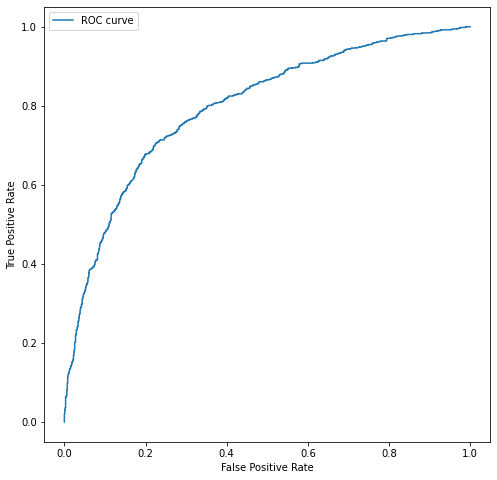

In [ ]:
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,BNBmodel.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

SVM

In [ ]:
hyper = {
       
     'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
     'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
      'kernel':['rbf','linear']
        }
#Hyper parameter tunning for SVM
gdsvm=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, cv = 3, verbose=True, n_jobs=-1)

gdsvm.fit(X_train,y_train)
print(gdsvm.best_score_)
print(gdsvm.best_estimator_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.7183740535808868
SVC(C=1)


In [ ]:
"""
Fitting 3 folds for each of 2 candidates, totalling 6 fits

0.7261252883524593
SVC(kernel='linear')

0.7003755063250252
SVC(gamma=0.1)

0.7238757570907537
SVC(C=1)

"""

In [ ]:
clf = svm.SVC(kernel='linear',gamma=1,C=0.1) 
clf.fit(X_train, y_train)

y_predsvmgrid = clf.predict(X_test)
print(confusion_matrix(y_predsvmgrid,y_test))

[[734 255]
 [247 765]]


In [ ]:
print(classification_report(y_predsvmgrid,y_test))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       989
           1       0.75      0.76      0.75      1012

    accuracy                           0.75      2001
   macro avg       0.75      0.75      0.75      2001
weighted avg       0.75      0.75      0.75      2001



Random Forest

In [ ]:
rfc=RandomForestClassifier(random_state=42)
rfcparam_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=rfcparam_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:

clf = RandomForestClassifier(n_estimators = 500,max_features = 'auto', max_depth=18,criterion='gini') 
clf.fit(X_train, y_train)
y_predrfc = clf.predict(X_test)
#from sklearn import metrics 
#print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_predrfc))

In [ ]:
print(classification_report(y_predrfc,y_test))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       953
           1       0.75      0.73      0.74      1048

    accuracy                           0.73      2001
   macro avg       0.73      0.73      0.73      2001
weighted avg       0.73      0.73      0.73      2001



Finding best model with hyperparameter tunning 


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
           'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         
          'kernel':['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
             'n_estimators': [200, 500],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
           
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
        
              'C' : np.logspace(-4, 4, 20),
      
        }
    },

    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.75775,"{'C': 0.1, 'kernel': 'linear'}"
1,random_forest,0.71725,"{'max_depth': 7, 'max_features': 'sqrt', 'n_es..."
2,logistic_regression,0.75725,{'C': 11.288378916846883}
3,naive_bayes_multinomial,0.74625,{}
4,decision_tree,0.66950,{'criterion': 'gini'}



Testing on random tweets


In [ ]:
tweet = 'These Russian have lost this war and they know it. Threatening with nuclear weapons is a sign of monumental failure and weakness.'
#tweet = 'This Maha Shivratri, may Lord Shiva destroy all your sorrows and eliminate all the troubles to help you lead a happy and healthy life. Help you become the force of Good '
#tweet="Russian attacks continue on evacuation route, despite declaring a ceasefire"
vectTweet = vectoriser.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer
prediction = logistic.predict(vectTweet)  # predicts class of the

if(prediction[0] == 1):
  print('Tweet is positive')
else:
  print('Tweet is negative')


Tweet is negative


In [ ]:
tweet = 'This Maha Shivratri, may Lord Shiva destroy all your sorrows and eliminate all the troubles to help you lead a happy and healthy life. Help you become the force of Good '
#tweet = 'These Russian have lost this war and they know it. Threatening with nuclear weapons is a sign of monumental failure and weakness.'
vectTweet = vectoriser.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer
prediction = naive_model.predict(vectTweet)  # predicts class of the

if(prediction[0] == 1):
  print('Tweet is positive')
else:
  print('Tweet is negative')

Tweet is positive


In [ ]:
tweet = 'This Maha Shivratri, may Lord Shiva destroy all your sorrows and eliminate all the troubles to help you lead a happy and healthy life. Help you become the force of Good'
#tweet = 'These Russian have lost this war and they know it. Threatening with nuclear weapons is a sign of monumental failure and weakness.'
vectTweet = vectoriser.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer
prediction = SVC.predict(vectTweet)  # predicts class of the
print(prediction[0])
if(prediction[0] == 1):
  print('Tweet is positive')
else:
  print('Tweet is negative')

1
Tweet is positive
